 #### Table of Contents

1. Import Data
2. Explore Data
3. Missing Values
4. Binary Encoding and Visualization of Multi-Select Survey Questions
5. Label Encoding and Visualization of Single-Select Survey Questions


### 1. Import  data

In [3]:
df_survey= pd.read_excel(r"C:\Users\frida\Downloads\Survey on the Use of AI for Teachers.xlsx")

### 2. Explore data 

In [4]:
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Gender                        20 non-null     object
 1   Age                           20 non-null     object
 2   Race                          20 non-null     object
 3   Years_of_teaching_experience  20 non-null     object
 4   Grade_level_taught            9 non-null      object
 5   Subject_taught                12 non-null     object
 6   AI_ usage_frequency           20 non-null     object
 7   AI_tools_use_in_classroom     10 non-null     object
 8   Contexts_of_AI_tool_use       11 non-null     object
 9   Perspective_on_ AI            20 non-null     object
 10  Impact_on_AI                  20 non-null     object
 11  Benefits_of_AI                13 non-null     object
 12  Concerns_about_AI             20 non-null     object
 13  Role_of_AI            

In [5]:
df_survey.describe()

,Gender,Age,Race,Years_of_teaching_experience,Grade_level_taught,Subject_taught,AI_ usage_frequency,AI_tools_use_in_classroom,Contexts_of_AI_tool_use,Perspective_on_ AI,Impact_on_AI,Benefits_of_AI,Concerns_about_AI,Role_of_AI,AI_mitigation_measures
count,20,20,20,20,9,12,20,10,11,20,20,13,20,17,20
unique,3,4,3,4,4,6,4,10,7,6,4,12,16,9,15
top,Female,30-49 years old,White,12+ years,Kindergarten,Special Education,Never,"Adaptive Learning Platforms: ex) IXL Learning,...",In-class activities,It has benefits but should be used cautiously.,3. Neutral,Greater Accessibility,"Impact on Critical Thinking, Limited Human Int...","Enhancing personalized learning experiences, S...",Implementing guidelines for responsible AI usa...
freq,15,7,17,11,3,5,9,1,4,11,9,2,3,5,2


### 3. Missing Values

In [7]:
df_survey.isnull().sum()

Gender                           0
Age                              0
Race                             0
Years_of_teaching_experience     0
Grade_level_taught              11
Subject_taught                   8
AI_ usage_frequency              0
AI_tools_use_in_classroom       10
Contexts_of_AI_tool_use          9
Perspective_on_ AI               0
Impact_on_AI                     0
Benefits_of_AI                   7
Concerns_about_AI                0
Role_of_AI                       3
AI_mitigation_measures           0
dtype: int64

In [8]:
df_survey =df_survey.fillna("")

In [9]:
df_survey.isnull().sum()

Gender                          0
Age                             0
Race                            0
Years_of_teaching_experience    0
Grade_level_taught              0
Subject_taught                  0
AI_ usage_frequency             0
AI_tools_use_in_classroom       0
Contexts_of_AI_tool_use         0
Perspective_on_ AI              0
Impact_on_AI                    0
Benefits_of_AI                  0
Concerns_about_AI               0
Role_of_AI                      0
AI_mitigation_measures          0
dtype: int64

### 4. Binary Encoding and Visualization of Multi-Select Survey Questions

The following multi-select survey questions were processed using the same approach:

- `AI_tools_use_in_classroom`
- `Contexts_of_AI_tool_use`
- `Benefits_of_AI`
- `Concerns_about_AI`
- `Role_of_AI`
- `AI_mitigation_measures`

**Processing steps:**

1. **Binary Encoding** – Each response option was converted into a separate binary column (1 = selected, 0 = not selected).
2. **Aggregation** – Total counts were calculated to show how frequently each option was selected across participants.
3. **Visualization** – Horizontal bar charts were generated with annotations showing both absolute counts and percentages.

The example below demonstrates this method using the `AI_mitigation_measures` question:



### AI_mitigation_measures

In [31]:
import pandas as pd

# Define the list of AI concerns to check
AI_measures = [
    'Implementing guidelines for responsible AI usage',
    'Providing training for teachers and parents on AI tools',
    'Establishing data privacy protections for students',
    'Encouraging critical thinking and problem-solving skills',
    'Limiting screen time and AI reliance',  
    'Fostering human interaction in learning environments'
]

# Add binary columns for each AI concern selection (without replacing original data)
for measure in AI_measures:
    df_survey[measure] = df_survey['AI_mitigation_measures'].apply(lambda x: 1 if measure in x else 0)

# Create the composite variable (sum of selected roles)
df_survey['Composite_AI_measures'] = df_survey[AI_measures].sum(axis=1)

# Display the updated DataFrame to confirm the new columns are added
df_survey.head(1)


,Gender,Age,Race,Years_of_teaching_experience,Grade_level_taught,Subject_taught,AI_ usage_frequency,AI_tools_use_in_classroom,Contexts_of_AI_tool_use,Perspective_on_ AI,...,Facilitating collaboration among students,Offering resources for skill development,Composite_Role_of_AI,Implementing guidelines for responsible AI usage,Providing training for teachers and parents on AI tools,Establishing data privacy protections for students,Encouraging critical thinking and problem-solving skills,Limiting screen time and AI reliance,Fostering human interaction in learning environments,Composite_AI_measures
0,Female,30-49 years old,White,1-3 years,4th grade,,Never,,,Unsure/No opinion.,...,0,0,3,1,0,0,1,1,0,3


C:\Users\frida\AppData\Local\Temp\ipykernel_53860\2656589254.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mitigation_measures_counts.values, y=mitigation_measures_counts.index, palette=bar_colors)
C:\Users\frida\AppData\Local\Temp\ipykernel_53860\2656589254.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(mitigation_measures_counts.index, fontsize=12)


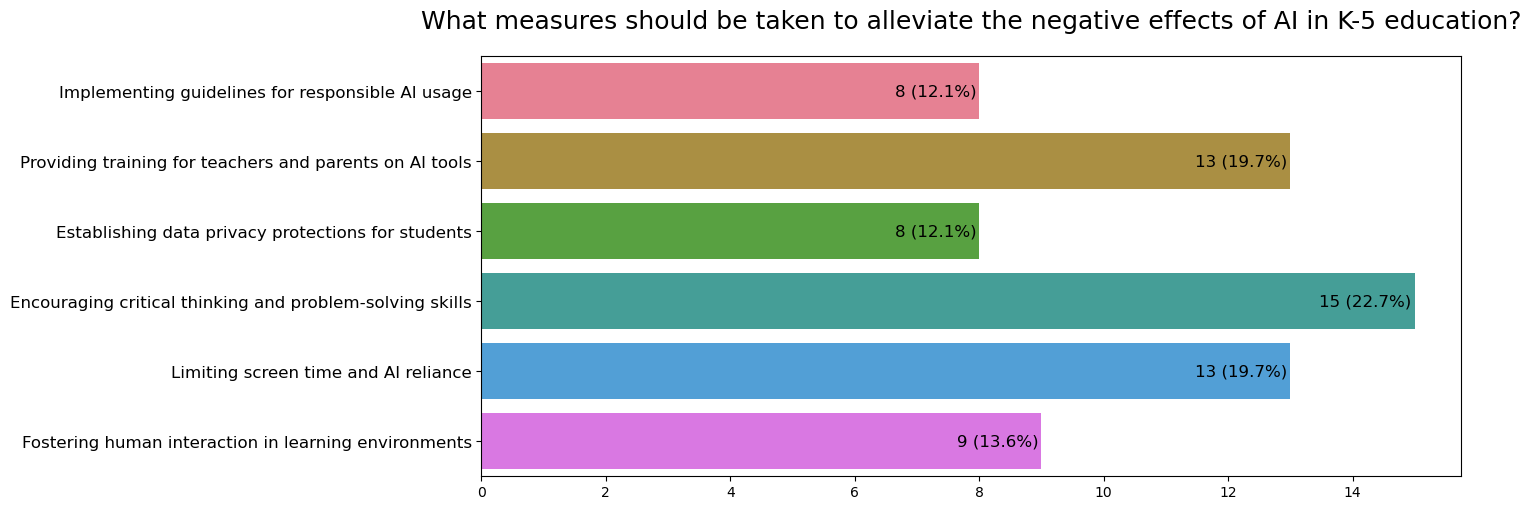

In [231]:
# Calculate how many times each AI mitigation measure was selected across all participants
mitigation_measures_counts = df_survey[AI_measures].sum()

# Total number of selections (sum of all mitigation measure counts)
mitigation_measures_total_counts = mitigation_measures_counts.sum()  # Corrected variable name

# Set up the plot with horizontal bars
plt.figure(figsize=(14, 6))  # Increase the width to give more space for annotations

# Use a bright and light color palette for the bars
bar_colors = sns.color_palette("husl", len(mitigation_measures_counts))  # Bright, light color palette

# Create the bar plot
ax = sns.barplot(x=mitigation_measures_counts.values, y=mitigation_measures_counts.index, palette=bar_colors)

# Add labels and title
plt.title('What measures should be taken to alleviate the negative effects of AI in K-5 education?', fontsize=18, pad=20)

# Add number and percentage annotations inside the end of each bar
for i, v in enumerate(mitigation_measures_counts.values):
    if v > 0:
        percentage = (v / mitigation_measures_total_counts) * 100
        ax.text(v - 0.05, i, f'{v} ({percentage:.1f}%)', color='black', va='center', ha='right', fontsize=12)
    else:
        ax.text(0.05, i, '0 (0%)', color='black', va='center', ha='left', fontsize=12)

# Set y-tick labels explicitly if there's an issue with the index
ax.set_yticklabels(mitigation_measures_counts.index, fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('')

# Adjust the layout
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)

# Save and display the plot
plt.savefig(r"C:\Users\frida\OneDrive\Documents\1_2024 Fall\Project\ai_mitigation_measures.png", dpi=300, bbox_inches='tight')
plt.show()


### 5. Label Encoding and Visualization of Single-Select Survey Questions

The following single-select survey questions were processed using the same approach:

- `Gender`  
- `Age`  
- `Race`  
- `Years_of_teaching_experience`  
- `Grade_level_taught`  
- `Subject_taught`  
- `AI_usage_frequency`  
- `Perspective_on_AI`  
- `Impact_of_AI`  

**Processing steps:**

- **Label Encoding** – Each categorical response option was assigned a unique integer code (e.g., 0, 1, 2, ...), enabling numerical analysis.  
- **Visualization** – Horizontal bar charts were generated to display the distribution of responses, annotated with counts and percentages for clarity.  
  In addition, pie charts were created for select variables such as grade level taught and subject taught to provide alternative visual perspectives.

The example below demonstrates this approach applied to the `Perspective_on_AI` question (bar chart), along with pie charts for `Grade_Level` and `Subject_taught`.


### Perspective_on_AI

In [493]:
df_survey["Perspective_on_AI"] = df_survey["Perspective_on_AI"].replace({
    "It is inevitable and necessary for progress.": 0,
    "It has benefits but should be used cautiously.": 1,
    "We should limit its use in education.": 2,
    "We should avoid using AI in education altogether.": 3,
    "Unsure/No opinion.": 4,
    "it's another great tool":5
})

C:\Users\frida\AppData\Local\Temp\ipykernel_53860\1914390359.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_survey["Perspective_on_AI"] = df_survey["Perspective_on_AI"].replace({


C:\Users\frida\AppData\Local\Temp\ipykernel_53860\3382016670.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=perspective_counts.index, x=perspective_counts.values, palette=bar_colors)
C:\Users\frida\AppData\Local\Temp\ipykernel_53860\3382016670.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(x)}' for x in ax.get_xticks()], fontsize=12)


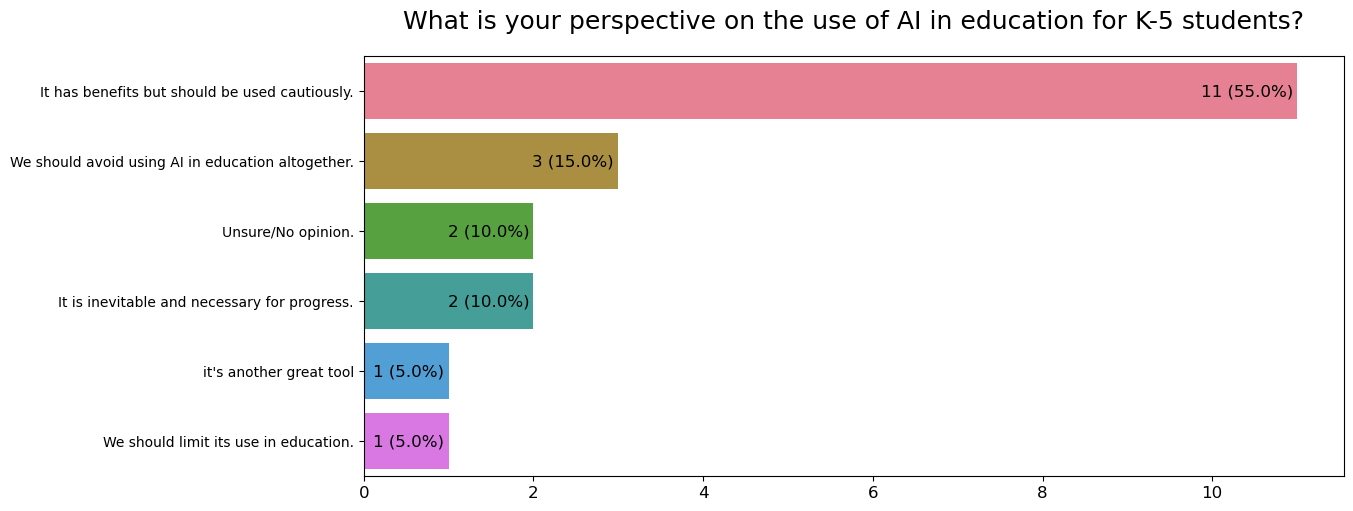

In [251]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reversing the replacement mapping: numeric values to textual responses
df_survey["Perspective_on_AI"] = df_survey["Perspective_on_AI"].replace({
    0: "It is inevitable and necessary for progress.",
    1: "It has benefits but should be used cautiously.",
    2: "We should limit its use in education.",
    3: "We should avoid using AI in education altogether.",
    4: "Unsure/No opinion.",
    5: "it's another great tool"
})

# Calculate how many times each perspective was selected across all participants
perspective_counts = df_survey['Perspective_on_AI'].value_counts()

# Total number of selections (sum of all perspective counts)
perspective_total_counts = perspective_counts.sum()

# Set up the plot with horizontal bars
plt.figure(figsize=(14, 6))  # Increase the width to give more space for annotations

# Use a bright and light color palette for the bars
bar_colors = sns.color_palette("husl", len(perspective_counts))  # Bright, light color palette

# Create the bar plot (ensuring horizontal bars)
ax = sns.barplot(y=perspective_counts.index, x=perspective_counts.values, palette=bar_colors)

# Add labels and title
plt.title('What is your perspective on the use of AI in education for K-5 students?', fontsize=18, pad=20)

# Add number and percentage annotations inside the end of each bar
for i, v in enumerate(perspective_counts.values):
    if v > 0:
        percentage = (v / perspective_total_counts) * 100
        ax.text(v - 0.05, i, f'{v} ({percentage:.1f}%)', color='black', va='center', ha='right', fontsize=12)
    else:
        ax.text(0.05, i, '0 (0%)', color='black', va='center', ha='left', fontsize=12)

# Set x-tick labels explicitly and adjust layout
ax.set_xticklabels([f'{int(x)}' for x in ax.get_xticks()], fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('')

# Adjust the layout
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)

# Save and display the plot
plt.savefig(r"C:\Users\frida\OneDrive\Documents\1_2024 Fall\Project\ai_perspective_plot.png", dpi=300, bbox_inches='tight')
plt.show()


In [479]:
df_survey_updated.head(3)

,Gender,Age,Race,Years_of_teaching_experience,Grade_level_taught,Subject_taught,AI_usage_frequency,Perspective_on_AI,Impact_on_AI,Chatbots and Conversational Agents: ex) ChatGPT,...,Facilitating collaboration among students,Offering resources for skill development,Composite_Role_of_AI,Implementing guidelines for responsible AI usage,Providing training for teachers and parents on AI tools,Establishing data privacy protections for students,Encouraging critical thinking and problem-solving skills,Limiting screen time and AI reliance,Fostering human interaction in learning environments,Composite_AI_measures
0,0,1,0,1,4,,5,Unsure/No opinion.,4. Negative,0,...,0,0,3,1,0,0,1,1,0,3
1,0,1,0,4,0,,5,It has benefits but should be used cautiously.,3. Neutral,0,...,0,1,2,0,1,0,0,1,1,3
2,0,2,0,4,,7,3,It has benefits but should be used cautiously.,2. Positive,0,...,0,1,3,0,1,0,1,1,0,3


### Grade_level and Subject_taught
 The percentage values are based on the cleaned and aggregated survey data.


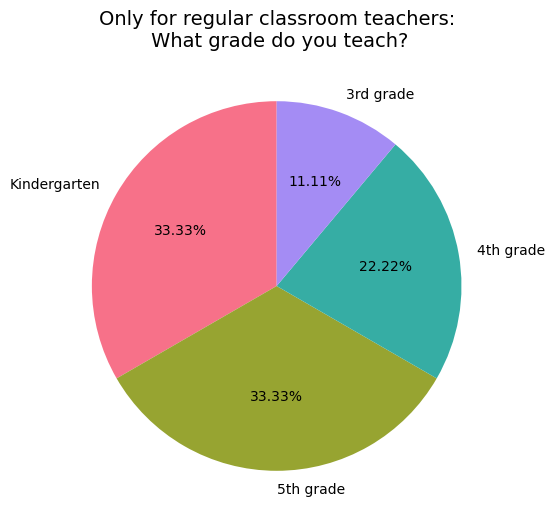

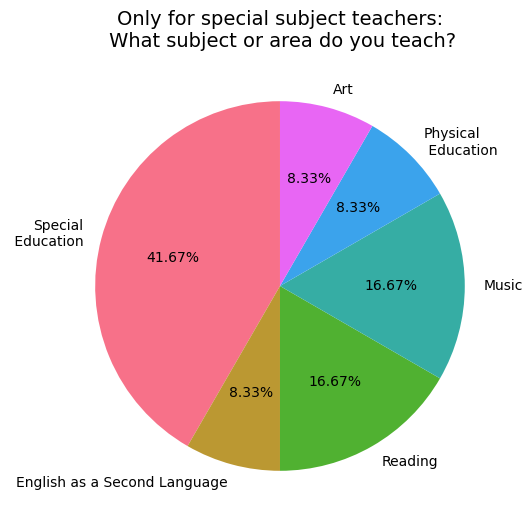

In [325]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for Grade Level
grade_level_labels = ['Kindergarten', '5th grade', '4th grade', '3rd grade']
grade_level_percentages = [15.00, 15.00, 10.00, 5.00]


# Data for Subject Taught (swap Music and English as a Second Language)
subject_labels = ['Special\n Education', 'English as a Second Language', 'Reading', 'Music', 'Physical\n Education', 'Art']
subject_percentages = [25.00, 5.00, 10.00, 10.00, 5.00, 5.00]

# Create separate pie charts

# Pie chart for Grade Level
fig1, ax1 = plt.subplots(figsize=(6, 6))
sns.set_palette("husl")  # Use husl color palette
ax1.pie(grade_level_percentages, labels=grade_level_labels, autopct='%1.2f%%', startangle=90, colors=sns.color_palette("husl", len(grade_level_labels)))
ax1.set_title('Only for regular classroom teachers:\n What grade do you teach?', fontsize=14)

# Save the first pie chart for Grade Level
fig1.savefig(r'C:\Users\frida\OneDrive\Documents\1_2024 Fall\Project\grade_level_pie_chart.png', dpi=300)

# Pie chart for Subject Taught
fig2, ax2 = plt.subplots(figsize=(6, 6))
ax2.pie(subject_percentages, labels=subject_labels, autopct='%1.2f%%', startangle=90, colors=sns.color_palette("husl", len(subject_labels)))
ax2.set_title('Only for special subject teachers:\n What subject or area do you teach?', fontsize=14)

# Save the second pie chart for Subject Taught
fig2.savefig(r'C:\Users\frida\OneDrive\Documents\1_2024 Fall\Project\subject_pie_chart.png', dpi=300)

# Show the pie charts
plt.show()
